In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
import pandas as pd
data = pd.read_csv('onlinefoods.csv', delimiter=',', encoding="ISO-8859-1")
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


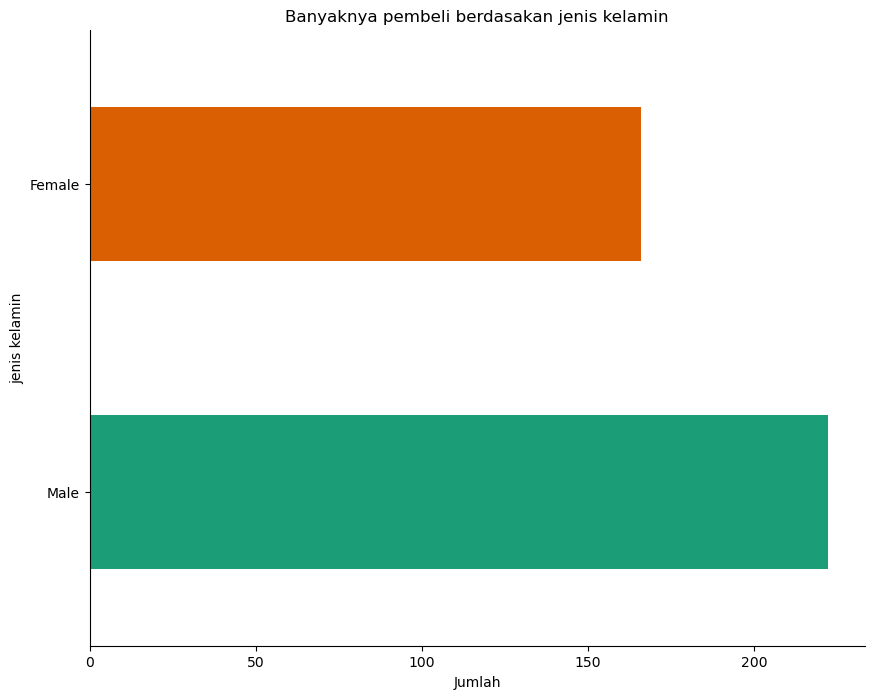

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Misalkan 'data' adalah DataFrame Anda
# Kelompokkan data berdasarkan 'Brand_Name' dan hitung ukuran masing-masing grup
Gender_counts = data.groupby('Gender').size().sort_values(ascending=False)

# Plot hasil
plt.figure(figsize=(10, 8))
Gender_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(Gender_counts)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.ylabel('jenis kelamin')
plt.title('Banyaknya pembeli berdasakan jenis kelamin')
plt.show()

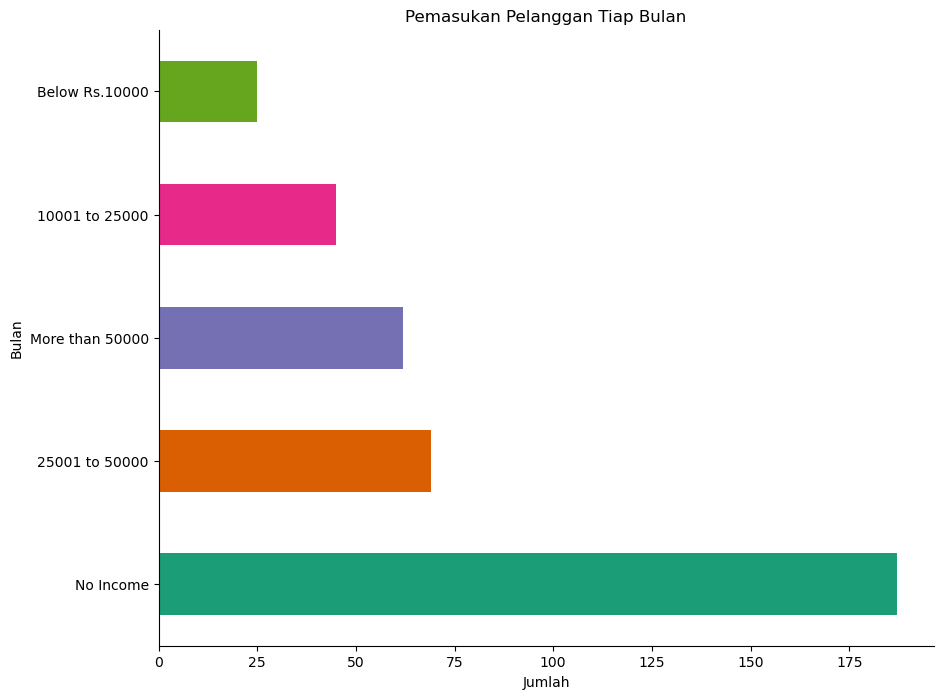

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Misalkan 'data' adalah DataFrame Anda
# Kelompokkan data berdasarkan 'Brand_Name' dan hitung ukuran masing-masing grup
Income_counts = data.groupby('Monthly Income').size().sort_values(ascending=False)

# Plot hasil
plt.figure(figsize=(10, 8))
Income_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(Income_counts)))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Jumlah')
plt.ylabel('Bulan')
plt.title('Pemasukan Pelanggan Tiap Bulan')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
# Load the dataset
data = pd.read_csv('onlinefoods.csv')
# Strip any leading/trailing whitespace from column names
data.columns = data.columns.str.strip()
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 12'])
# Identify categorical and numerical columns
categorical_cols = ['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications']
numerical_cols = ['Age', 'Monthly Income', 'Family size', 'latitude', 'longitude', 'Pin code']

In [18]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [20]:
# Separate features and target variable
X = data.drop(['Marital Status'], axis=1)
y = data['Marital Status']

# Encoding categorical variables
categorical_features = ['Gender', 'Occupation', 'Monthly Income',
                        'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

print(X_processed.shape)

(388, 23)


In [21]:
# Separate features and target variable
X = data.drop(['Marital Status'], axis=1)
y = data['Marital Status']

# Convert target variable to numerical (assuming 'Yes' maps to 1 and other values to 0)
y = y.apply(lambda x: 1 if x == 'Single' else 0)

# Encoding categorical variables
categorical_features = ['Gender', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features) # OneHotEncoder to handle categorical features
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X) # Transform the data using the preprocessor

# Split data into train and test sets after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(X_processed.shape)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5) # Use preprocessed data for training
    print(f"{name} CV Mean Accuracy: {cv_scores.mean()}")

    # Train the model
    model.fit(X_train, y_train) # Use preprocessed data for training

    # Predict on test set
    y_pred = model.predict(X_test) # Use preprocessed data for testing

    # Evaluate the model
    print(f"Model: {name}")
    # Use appropriate metrics for regression tasks
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R-squared: {r2_score(y_test, y_pred)}")
    print("\n")

(388, 23)
Logistic Regression CV Mean Accuracy: 0.8709677419354838
Model: Logistic Regression
Mean Squared Error: 0.14102564102564102
R-squared: 0.2055555555555557


Random Forest CV Mean Accuracy: 0.9064516129032258
Model: Random Forest
Mean Squared Error: 0.07692307692307693
R-squared: 0.5666666666666668


SVM CV Mean Accuracy: 0.8838709677419354
Model: SVM
Mean Squared Error: 0.1282051282051282
R-squared: 0.2777777777777779




In [22]:
# Separate features and target variable
X = data.drop(['Marital Status'], axis=1)
y = data['Marital Status']

# Encoding categorical variables
categorical_features = ['Gender', 'Occupation', 'Monthly Income',
                        'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Preprocessing pipeline for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features) # OneHotEncoder to handle categorical features
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X) # Transform the data using the preprocessor

# Split data into train and test sets after preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(X_processed.shape)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Import necessary metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train and evaluate models
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5) # Use preprocessed data for training
    print(f"{name} CV Mean Accuracy: {cv_scores.mean()}")

    # Train the model
    model.fit(X_train, y_train) # Use preprocessed data for training

    # Predict on test set
    y_pred = model.predict(X_test) # Use preprocessed data for testing

    # Evaluate the model
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted')}")
    print(classification_report(y_test, y_pred))
    print("\n")

(388, 23)
Logistic Regression CV Mean Accuracy: 0.8451612903225806
Model: Logistic Regression
Accuracy: 0.8717948717948718
Precision: 0.8600252206809583
Recall: 0.8717948717948718
F1-Score: 0.8658614113159567
                   precision    recall  f1-score   support

          Married       0.71      0.71      0.71        17
Prefer not to say       0.00      0.00      0.00         1
           Single       0.92      0.93      0.93        60

         accuracy                           0.87        78
        macro avg       0.54      0.55      0.54        78
     weighted avg       0.86      0.87      0.87        78





c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\s

Random Forest CV Mean Accuracy: 0.8870967741935484
Model: Random Forest
Accuracy: 0.9102564102564102
Precision: 0.9002849002849004
Recall: 0.9102564102564102
F1-Score: 0.905128205128205
                   precision    recall  f1-score   support

          Married       0.78      0.82      0.80        17
Prefer not to say       0.00      0.00      0.00         1
           Single       0.95      0.95      0.95        60

         accuracy                           0.91        78
        macro avg       0.58      0.59      0.58        78
     weighted avg       0.90      0.91      0.91        78



SVM CV Mean Accuracy: 0.8516129032258064
Model: SVM
Accuracy: 0.8846153846153846
Precision: 0.8706575682382134
Recall: 0.8846153846153846
F1-Score: 0.877297565822156
                   precision    recall  f1-score   support

          Married       0.75      0.71      0.73        17
Prefer not to say       0.00      0.00      0.00         1
           Single       0.92      0.95      0.93    

c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\Lib\site-packages\s

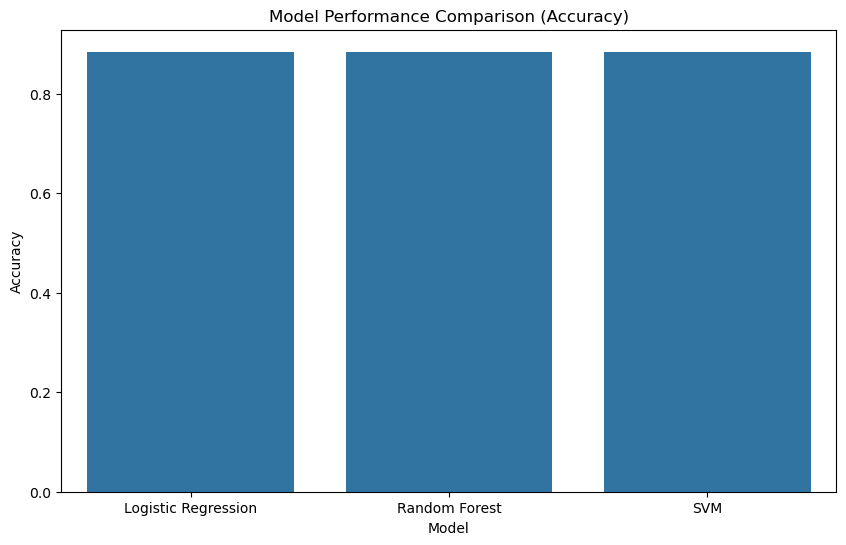

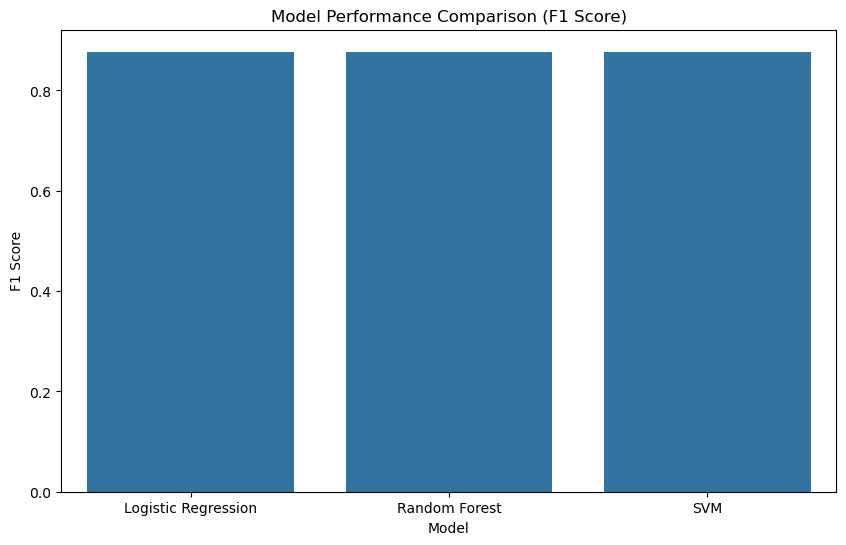

In [23]:
# ... (previous code)

# Initialize a dictionary to store results
results = {'Model': [], 'Accuracy': [], 'F1 Score': []}

# Train and evaluate models
for name, model in models.items():
    # ... (model training and evaluation)

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))

# Create DataFrame from results
df_results = pd.DataFrame(results)

# Visualization of model performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_results) # Use the results DataFrame
plt.title('Model Performance Comparison (Accuracy)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=df_results) # Use the results DataFrame
plt.title('Model Performance Comparison (F1 Score)')
plt.show()